In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv(r"C:\Users\shaky\Downloads\models\Email Spam Classifier\spam.csv",encoding="ISO-8859-1")

In [20]:
df.shape

(5572, 5)

# ***Data Cleaning***

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [35]:
#dropping last three columns as there are large number of null values
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [43]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [47]:
df.sample(5)

,v1,v2
5206,ham,I will reach ur home in &lt;#&gt; minutes
1971,ham,Enjoy ur life. . Good night
3497,ham,You said to me before i went back to bed that ...
4287,ham,Hey mr whats the name of that bill brison book...
303,ham,He is a womdarfull actor


In [60]:
df.rename(columns = {'v1':'target','v2':'text'},inplace=True)

In [62]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
from sklearn.preprocessing import LabelEncoder

In [66]:
encoder = LabelEncoder()

In [70]:
df['target'] = encoder.fit_transform(df['target'])

In [72]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [74]:
#checking null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [76]:
#checkinng duplicate values
df.duplicated().sum()

403

In [80]:
#removing duplicates
df = df.drop_duplicates(keep='first')

In [84]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# ***EDA***

In [91]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

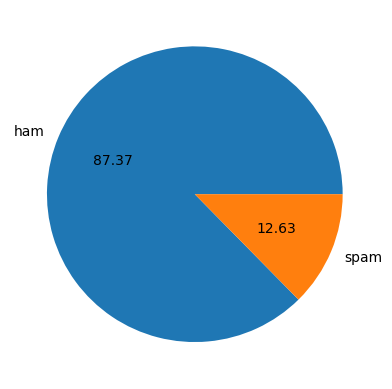

In [95]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show

In [97]:
import nltk

In [99]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [105]:
df['num_characters'] = df['text'].apply(len)
df.head()

C:\Users\shaky\AppData\Local\Temp\ipykernel_2972\83982535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [113]:
#num of words
df['num_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\shaky\AppData\Local\Temp\ipykernel_2972\2339556096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [115]:
df

,target,text,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [121]:
df['number_of_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\shaky\AppData\Local\Temp\ipykernel_2972\4112524652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [123]:
df.head()

,target,text,num_characters,num_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [125]:
df.describe()

,target,num_characters,num_of_words,number_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [129]:
#ham
df[df['target']==0].describe()

,target,num_characters,num_of_words,number_of_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [131]:
#spam
df[df['target']==1].describe()

,target,num_characters,num_of_words,number_of_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

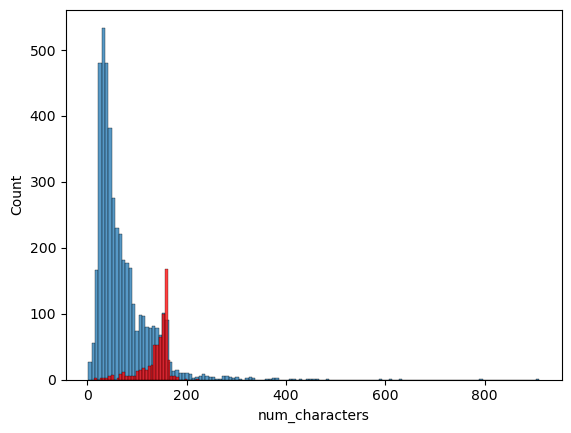

In [139]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

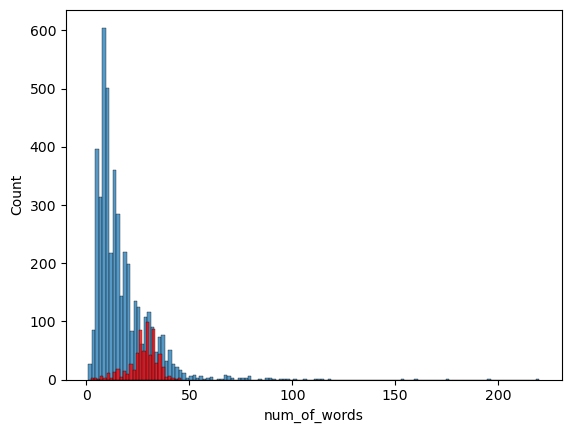

In [141]:
sns.histplot(df[df['target']==0]['num_of_words'])
sns.histplot(df[df['target']==1]['num_of_words'],color='red')

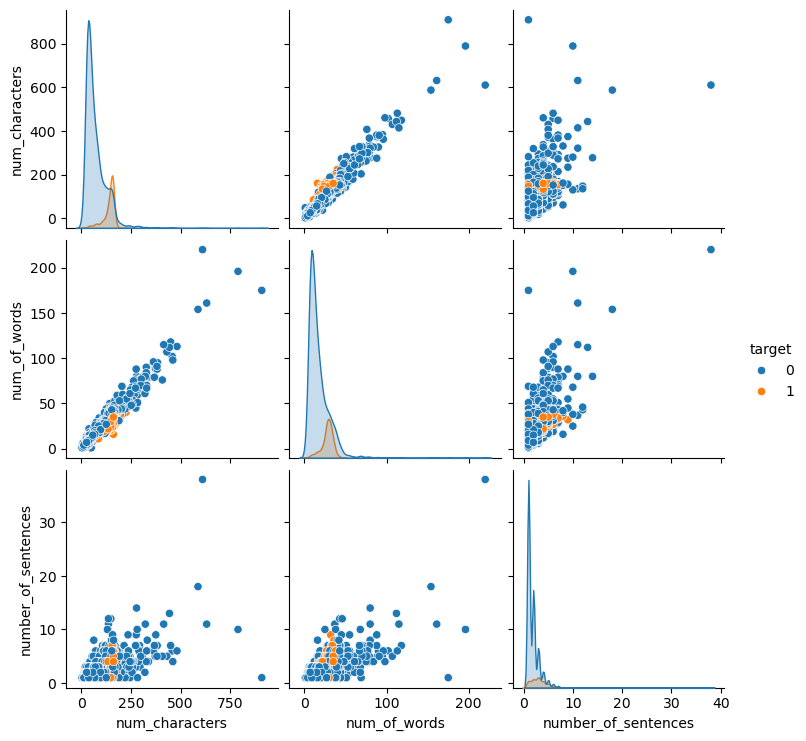

In [147]:
sns.pairplot(df,hue='target')

<Axes: >

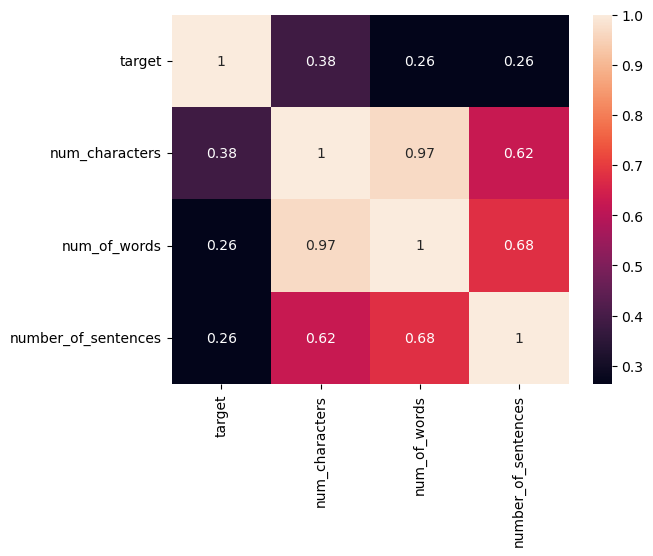

In [153]:
sns.heatmap(df.corr(numeric_only=True),annot=True)


# ***Data Preprocessing***
1. Converting each alphabets to lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [168]:
 from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [186]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [190]:
transform_text('I LOved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [196]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\shaky\AppData\Local\Temp\ipykernel_2972\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [198]:
df.head()

,target,text,num_characters,num_of_words,number_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [222]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [238]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

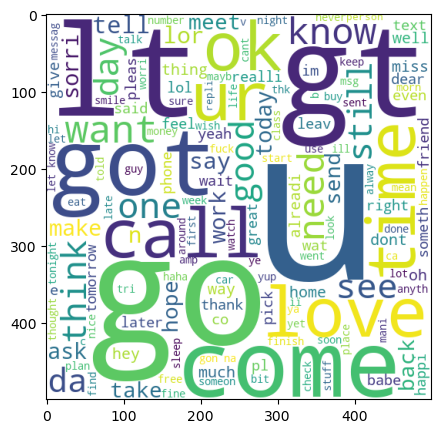

In [246]:
plt.figure(figsize=(5,5))
plt.imshow(spam_wc)

In [242]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

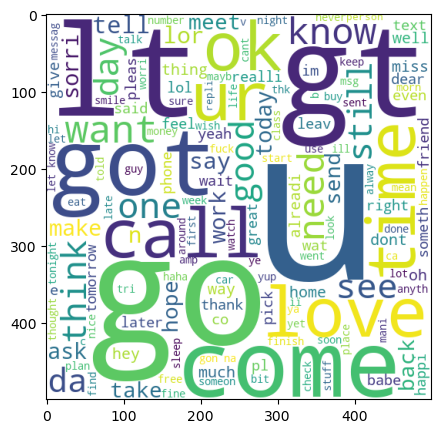

In [248]:
plt.figure(figsize=(5,5))
plt.imshow(ham_wc)

# ***Model Building***

In [300]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [268]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [270]:
X.shape

(5169, 6708)

In [272]:
y = df['target'].values

In [274]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [276]:
from sklearn.model_selection import train_test_split

In [278]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [284]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [290]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [292]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [294]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [296]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [318]:
#using tfidf vectorizer

In [302]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray() 

In [304]:
X1.shape

(5169, 6708)

In [306]:
X_train1,X_test1,y_train1,y_tes1t = train_test_split(X1,y,test_size=0.2,random_state=2)

In [308]:
gnb.fit(X_train1,y_train1)
y_pred4 = gnb.predict(X_test1)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [310]:
mnb.fit(X_train1,y_train1)
y_pred5 = mnb.predict(X_test1)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [312]:
bnb.fit(X_train1,y_train1)
y_pred6 = bnb.predict(X_test1)
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [316]:
# since the data is imbalanced so the maximum precision_score is obtained from tfidf-->MultinominialNB

In [333]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [331]:
print('numpy',np.__version__)
print('pandas',pd.__version__)
print('sklearn',sklearn.__version__)

numpy 1.26.4
pandas 2.2.1
sklearn 1.2.2


In [329]:
import sklearn